# Project: Investigate a Dataset - [No-Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project, we will analyze a dataset and then communicate our findings about it. We will use the Python libraries NumPy, pandas, seaborn and Matplotlib to make our analysis easier. 

After completing the project, we hope to:
- Know all the steps involved in a typical data analysis process
- Be comfortable posing questions that can be answered with a given dataset and then answering those questions
- Know how to investigate problems in a dataset and wrangle the data into a format you can use
- Have experience communicating the results of your analysis
- Be able to use vectorized operations in NumPy and pandas to speed up your data analysis code
- Be familiar with pandas' Series and DataFrame objects, which let you access your data more conveniently
- Know how to use Matplotlib to produce plots showing your findings

### Dataset Description 

> The [data](https://www.kaggle.com/datasets/joniarroba/noshowappointments) ultilized in this project comprises of 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each column. Some of these characteristics include:
1. **PatientId**
  * Identification of a patient
2. **AppointmentID**
    * Identification of each appointment
3. **Gender**
   * Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
4. **DataMarcacaoConsulta**
    * The day of the actuall appointment, when they have to visit the doctor.
5. **DataAgendamento**
    * The day someone called or registered the appointment, this is before appointment of course.
6. **Age**
    - How old is the patient.
7. **Neighbourhood**
    * Where the appointment takes place.
8. **Scholarship**
    * True of False . Observation, this is a broad topic, consider reading this [article ](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
9. **Hipertension**
    * True or False
10. **Diabetes**
    * True or False
11. **Alcoholism**
    - True or False
12. **Handcap**
    * True or False
13. **SMS_received**
    * 1 or more messages sent to the patient.
14. **No-show**
    * Yes or No. However, be careful about the encoding of the last column: it says ‘No’ if the patient showed up to theirappointment, and ‘Yes’ if they did not show up.

### Question(s) for Analysis
> Some of the research questions which will be analyzed in the project include;
 1. **Does the Ages of patients determine their appointment show up status and by how much?**
 2. **Having some days left before meeting the doctor, does it affect show up status?**
 3. **Which Gender shows up for appointments the most?**
 4. **Which Ages recieved SMS messages and how do they respond to the appointment?**
 5. **Which Ages are diabetic and how do they respond to the appointment?**
 6. **Which Ages are hypertensive and how do they respond to the appointment?**
 7. **Which Ages are into alcoholism and how do they respond to the appointment?**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Here, we will start first by loadiing the data and detecting various data quality issues associated with the data. The later sections will entail cleaning and handling the various identified data issues. 

In [2]:
# Load the data
df_noshow = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Check correctness of column names
df_noshow.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [4]:
# shape of the data
df_noshow.shape

(110527, 14)

In [5]:
# check data types
df_noshow.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
# Get more information
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# Check for missing values
df_noshow.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
# Check for duplicates
df_noshow.duplicated().sum()

0


### Data Cleaning
> After conducting basic analysis on the data, we have identified some data quality issues which must be handled and they include; 
> ## Identified Issues
After conducting basic analysis on the data, we have identified some data quality issues which must be handled and they include:
1. **Unecessary feature names**
    * Some personal features such as "PatientId" and "AppointmentID" will be dropped as they personalized features and such won't have much insight to give about the patients.
2. **Structural errors**
    * All the column names should be changed into lower cases and also the **No-show** should better changed to no_show
3. **Wrong Data Types**
    * Data types for "ScheduledDay" and "AppointmentDay" should be changed to a datetime data type. Before doing that, we need to separate the date and timestep that are together.

> Next we will start cleaning the data by handling the above issues identified in the data.

### Dropping unecessary columns

In [9]:
# Drop the columns
df_noshow.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [10]:
# Lets check
df_noshow.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Handling the structural errors

In [11]:
# we change all column names to lowercase
df_noshow.columns = df_noshow.columns.str.lower()

In [12]:
# lets check to confirm
df_noshow.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


After changing all column names to lowercase, next we change the 'no-show' to 'no_show' for better referencing as shown below.

In [13]:
# lets change the no-show to no_show
df_noshow.rename(columns={'no-show':'no_show'}, inplace=True)

In [14]:
df_noshow.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [15]:
df_noshow.age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

In [16]:
# remove rows using the drop() function
df_noshow.drop(df_noshow.index[df_noshow['age'] == -1], inplace=True)

### Handling wrong Data Types

In [17]:
# Lets eliminate the timestep
df_noshow['scheduledday'] = df_noshow['scheduledday'].apply(lambda x: x.split("T")[0])
df_noshow['appointmentday'] = df_noshow['appointmentday'].apply(lambda x: x.split("T")[0])

In [18]:
# Lets check to confirm
df_noshow.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [19]:
# Lets change the data types
df_noshow['scheduledday'] = pd.to_datetime(df_noshow['scheduledday'])
df_noshow['appointmentday'] = pd.to_datetime(df_noshow['appointmentday'])

In [20]:
df_noshow.dtypes

gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no_show                   object
dtype: object

> ## Observation and findings
We will be creating a new column for the difference between the date for scheduled day of appointment and and actual day of appoint so as to gain some insights.

In [21]:
# Lets create the difference in days
df_noshow['days_before'] = (df_noshow['appointmentday'] - df_noshow['scheduledday']).dt.days

In [22]:
df_noshow.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_before
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0


In [23]:
# Lets check
df_noshow['days_before'].value_counts()

 0      38562
 2       6725
 4       5290
 1       5213
 7       4906
        ...  
 117        1
 146        1
 82         1
-6          1
 127        1
Name: days_before, Length: 131, dtype: int64

> **Note**: We need to remove the negative values in the days_before because it means that the actual appointment was made before it was scheduled.

In [24]:
# remove rows using the drop() function
def drop_negative(data, value):
    data.drop(data.index[data == value], inplace=True)
    return data

In [25]:
drop_negative(df_noshow['days_before'], -6) # drop -6 
drop_negative(df_noshow['days_before'], -1) # drop -1

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: days_before, Length: 110521, dtype: int64

In [26]:
# Lets check
df_noshow['days_before'].value_counts()

0      38562
2       6725
4       5290
1       5213
7       4906
       ...  
101        1
132        1
151        1
146        1
127        1
Name: days_before, Length: 129, dtype: int64

In [27]:
# Lets check
df_noshow.shape

(110526, 13)

In [28]:
df_noshow.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_before
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


> ### We now have a clean data !
Next, we will begin exploring our data so as to answer the aforementioned questions

<a id='eda'></a>
## Exploratory Data Analysis

Here, we will begin to explore our data using both descriptive and visuals to give answers to our developed questions.

### Research Question 1 (Does the Ages of patients determine their appointment show up status and by how much?)

In [29]:
df_noshow.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_before
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0


In [30]:
# create two dataframes
df_yes = df_noshow[df_noshow['no_show'] == 'Yes']
df_no = df_noshow[df_noshow['no_show'] == 'No']

In [31]:
df_yes['age'].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: age, dtype: float64

In [32]:
df_no['age'].describe()

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: age, dtype: float64

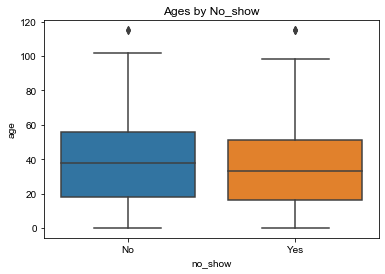

In [33]:
sns.boxplot(x ='no_show', y ='age', data = df_noshow)
sns.set_style("darkgrid")
plt.title('Ages by No_show');

> ### Observations and findings
From both the descriptive statistics and visualization done above, we can see that patients with average ages of 37+ years don't usually miss their appointments with the Doctor. Hence, age can be used to determine the no_show up status of the patients. 

### Research Question 2  (Having some days left before meeting the doctor, does it affect show up status?)

In [34]:
df_yes['days_before'].describe()

count    22319.000000
mean        15.831489
std         16.605912
min         -6.000000
25%          4.000000
50%         11.000000
75%         23.000000
max        179.000000
Name: days_before, dtype: float64

In [35]:
df_no['days_before'].describe()

count    88207.000000
mean         8.754759
std         14.550450
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max        179.000000
Name: days_before, dtype: float64

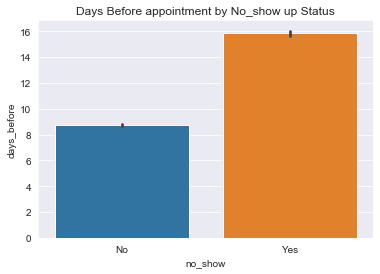

In [36]:
# change the estimator from mean to standard deviation
sns.barplot(x ='no_show', y ='days_before', data = df_noshow)
plt.title('Days Before appointment by No_show up Status');

> ### observations and findings
It appears that patients who book or schedule appointments in longer number days interval are more likely not to show up for their appointments. This can be because they forgot or no reminder sms was sent to them. 

### Research Question  3 ( Which Gender shows up for appointments the most?)

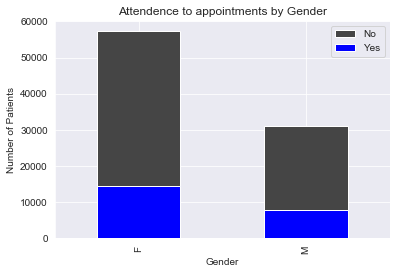

In [37]:
plt.title('Attendence to appointments by Gender')
df_no['gender'].value_counts().plot(kind='bar', label='No', color='#454545')
df_yes['gender'].value_counts().plot(kind='bar', label='Yes', color='blue')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend()

> ### Observations and findings
This shows clearly that in the female patients always show up for their appointments more than the male patients. 

### Research Question  4 (Which Ages recieved SMS messages and how do they respond to the appointment?)

In [38]:
# boxplot function
def plot_boxplot(x, y, data, hue):
    plt.subplots(figsize=(10, 8))
    sns.set_style("darkgrid")
    plt.title(f'Attendence to appointments by {x} and {hue}');
    print(sns.boxplot(x = x, y = y, data = data, hue=hue, width=0.5));

AxesSubplot(0.125,0.125;0.775x0.755)


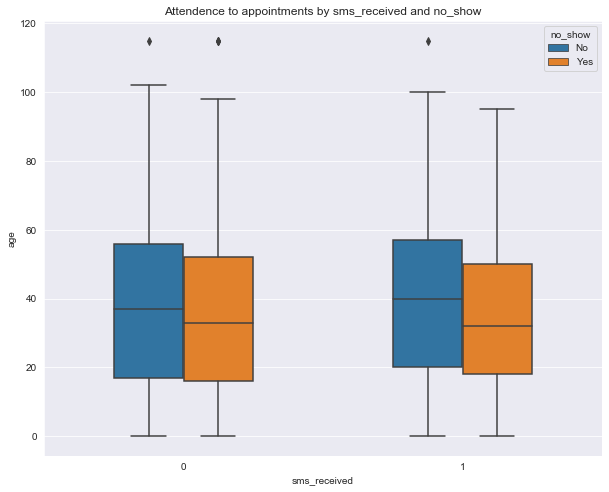

In [39]:
plot_boxplot('sms_received', 'age', df_noshow, 'no_show')

> ### Observations and findings
It appears that the elderly patients received reminder sms and as such most of them showed up for their appointment with the Doctor.

### Research Question  5 (Which Ages are diabetic and how do they respond to the appointment?)

AxesSubplot(0.125,0.125;0.775x0.755)


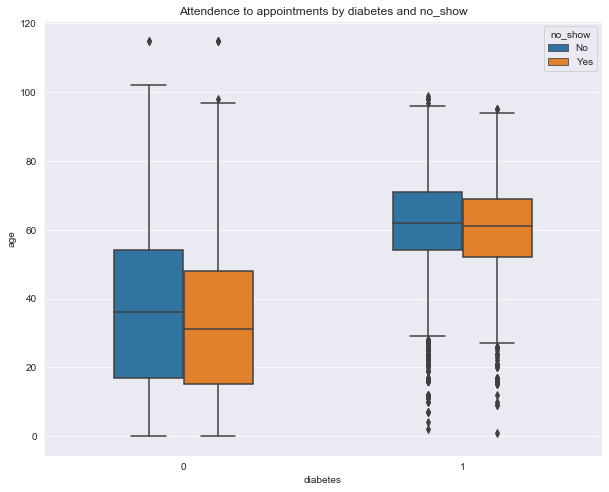

In [40]:
plot_boxplot('diabetes', 'age', df_noshow, 'no_show')

> ### Observation and findings
60+ average years of patients are diabetic and a higher number of them are always keeping to their appointments.

### Research Question  6 (Which Ages are hypertensive and how do they respond to the appointment?)

AxesSubplot(0.125,0.125;0.775x0.755)


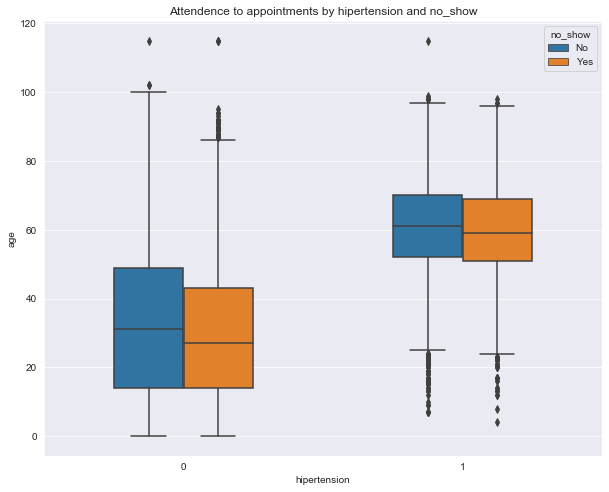

In [41]:
plot_boxplot('hipertension', 'age', df_noshow, 'no_show')

> ### Observation and findings
60+ average years of patients are hipertensive and a higher number of them are always keeping to their appointments.

### Research Question  7  (Which Ages are into alcoholism and how do they respond to the appointment?)

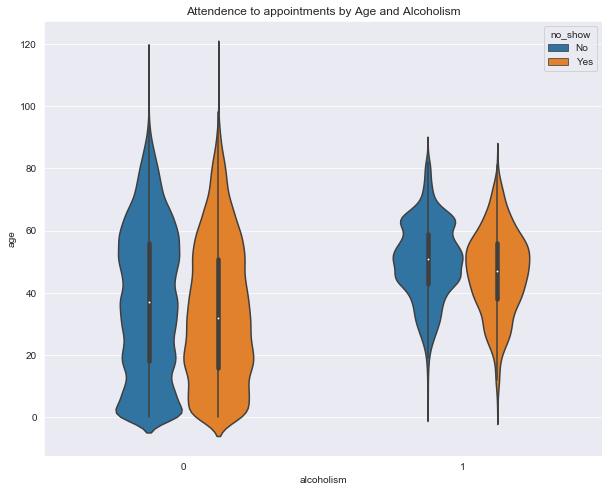

In [42]:
plt.subplots(figsize=(10, 8))
sns.violinplot(x ='alcoholism', y ='age', data = df_noshow, hue='no_show', width=0.5)
sns.set_style("darkgrid")
plt.title('Attendence to appointments by Age and Alcoholism');

> ### Observation and findings
44+ average years of patients are into acoholism and a higher number of them are always keeping to their appointments.

<a id='conclusions'></a>
## Conclusions
We have successfully analyzed the dataset by cleaning and handling some identified data quality issues. Here are summary of some useful insights obtained from the data;

> **1**: Patients with average ages of 37+ years usually do not miss their appointments with the doctor. However, additional inferential statistics need to be done for better conclusion. 

> **2**: Patients who plan or schedule appointments with a greater number of days interval appear to be more prone to miss their appointments. This could be because they forgot or because no reminder SMS was sent to them. Hence, reminders should be adopted for patients who book higher days interval. 

> **3** The analysis demonstrates that female patients tend to consistently show up for their visits more than male patients.

> **4**: It seems that the older patients received SMS reminders, and as a result, the majority of them attended their doctor's visit. However, further research should be conducted to prove this. 

> **5**: Patients with diabetes have an average age of 60+ years, and a higher percentage of them always keep their appointments.

> **6**: Patients with a mean age of 60+ years are hypertensive, and a higher proportion of them always keep their appointments.

> **7**: Patients with an average age of 44+ years appear to be addicted to alcohol, and a higher percentage of them always keep their appointments.


### Limitations

> **1**: Information such as location and distance to the hospital were not given which would given more insight to the reasons why patients tend to miss their appointments

> **2**: The number of times the sms message was sent was not given and would have increased the attendance rate of the patients. 

> **3**: This work is limited to only descriptive statistics and visualizations and did not consider inferential statistics and machine learning analysis.

In [44]:
# Generating .html formate of this notebook. 0 outputs indicates successful !
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

# List of Reference masterials
* https://pandas.pydata.org/pandas-docs/version/1.1.2/reference/api/pandas.core.groupby.DataFrameGroupBy.boxplot.html
* https://www.codecademy.com/article/seaborn-design-
* https://htmlcolorcodes.com/
* https://datascienceparichay.com/article/create-a-pie-chart-of-pandas-series-values/#:~:text=To%20plot%20a%20pie%20chart%2C%20you%20first%20need%20to%20create,pandas%20series%20plot()%20function.
* https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/